In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string


df = pd.read_csv("chicago_taxi.csv")
drop_list = ['Pickup Centroid Longitude', 'Pickup Centroid Latitude', 
            'Trip ID', 'Trip Start Timestamp', 'Taxi ID', 'Pickup Centroid Location',
            'Pickup Census Tract', 'Trip End Timestamp', 'Dropoff Census Tract',
            'Payment Type', 'Pickup Community Area', 'Company', 'Dropoff Centroid  Location']
df.drop(drop_list, axis=1, inplace=True)
cols = list(df.columns)
test_df = df
cols

['Trip Seconds',
 'Trip Miles',
 'Dropoff Community Area',
 'Fare',
 'Tips',
 'Tolls',
 'Extras',
 'Trip Total',
 'Dropoff Centroid Latitude',
 'Dropoff Centroid Longitude']

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = scaler.fit_transform(df)
x = np.nan_to_num(x)

In [3]:
# Fit into K-Means

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=21)
kmeans.fit(x)
center_points = kmeans.cluster_centers_
y_pred = kmeans.fit_predict(x)

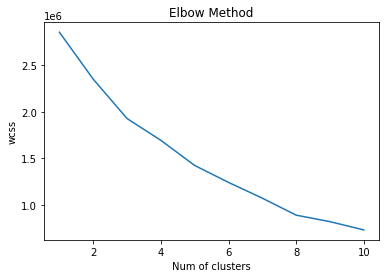

In [4]:
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Num of clusters')
plt.ylabel('wcss')
plt.show()

In [5]:
centers = pd.DataFrame(center_points, columns=df.columns)


In [6]:
# Testing

In [7]:
from sklearn.metrics import v_measure_score
from sklearn.metrics import v_measure_score


def run(y, x):
    v_score = []
    clusters = [2, 3, 4, 5, 6, 7]
    y = test_df['Fare']
    y= np.nan_to_num(y)
    
    for cluster in clusters:
        kmeans = KMeans(n_clusters=cluster)
        kmeans.fit(x)
        labels = kmeans.predict(x)
        v_score.append(v_measure_score(y, labels))
        
    plt.bar(clusters, v_score)
    plt.xlabel('num of clusters')
    plt.ylabel('v-measure score')
    plt.title('cluster test')
    plt.show()
    

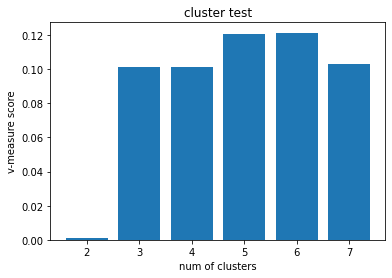

In [8]:
from sklearn.metrics import v_measure_score

y = test_df['Fare']
run(y, x)

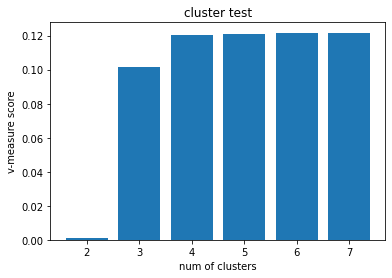

In [9]:
y = test_df['Extras']
run(y, x)

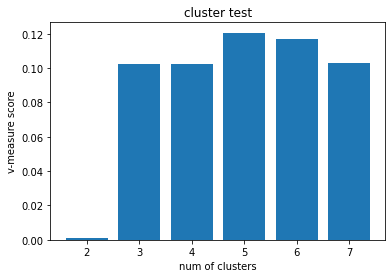

In [10]:
y = test_df['Tolls']
run(y, x)

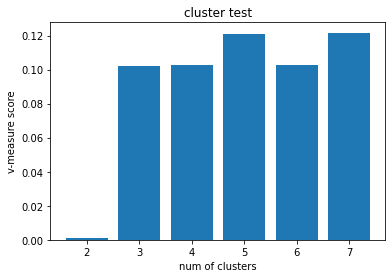

In [11]:
y = test_df['Dropoff Community Area']
run(y, x)

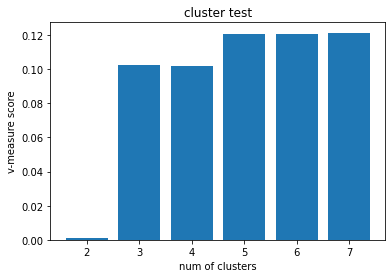

In [13]:
y = test_df['Trip Miles']
run(y, x)

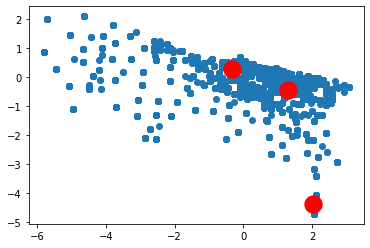

cluster center points
[[-0.33040207  0.26555881]
 [ 2.02893744 -4.36514108]
 [ 1.30862146 -0.43043619]]


In [14]:
plot_df = df[['Dropoff Centroid Latitude', 'Dropoff Centroid Longitude']].copy()
x = scaler.fit_transform(plot_df)
x = np.nan_to_num(x)
kmeans = KMeans(n_clusters=3, max_iter=300, n_init=10, random_state=0)
y_pred = kmeans.fit_predict(x)

plt.scatter(x[:,0], x[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()
print("cluster center points")
print(kmeans.cluster_centers_)